Problem Statement:
To develop a real-time sign language detection system that can accurately interpret and translate sign language gestures into text or speech.
The system should be capable of recognizing a wide range of sign language gestures in various environmental conditions and provide instant feedback.


# **Import and Install Dependencies**

In [ ]:
#!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# **Keypoints using MP Holistic**

In [2]:
mp_holistic = mp.solutions.holistic #Holistic file
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  #Color Conversion
    image.flags.writeable = False                  #Set image writable status as false(non-writable)
    results = model.process(image)                 #Image detection
    image.flags.writeable = True                   #Set image writable status as true(writable)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #Color Conversion
    return image, results

In [4]:
def draw_landmarks(image, results): #Grab the results and render them to the image
    #not return image, rather applies landmark visualisation to current image
    #Makes easier to draw landmarks onto an image
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION )   # draw face landmarks
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)        # draw pose landmarks
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)   # draw left hand landmarks
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # draw right hand landmarks

In [5]:
def draw_styled_landmarks(image, results):
    # draw face landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                              mp_drawing.DrawingSpec(color = (80,110,10), thickness = 1, circle_radius = 1),
                              mp_drawing.DrawingSpec(color = (80,256,121), thickness = 1, circle_radius = 1)) 
    # draw pose landmarks
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color = (80,22,10), thickness = 2, circle_radius = 4),
                              mp_drawing.DrawingSpec(color = (80,44,121), thickness = 2, circle_radius = 2)) 
    # draw left hand landmarks
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color = (121,22,78), thickness = 2, circle_radius = 4),
                              mp_drawing.DrawingSpec(color = (121,44,250), thickness = 2, circle_radius = 2))
    # draw right hand landmarks
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color = (245,117,66), thickness = 2, circle_radius = 4),
                              mp_drawing.DrawingSpec(color = (245,66,230), thickness = 2, circle_radius = 2))  

In [6]:
# Access webcam through OpenCV
cap = cv2.VideoCapture(0)  # Access the default webcam (change the index if needed)
#set mediapipe mmodel
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        #Read feed
        ret, frame = cap.read()

        #Make detections
        image, results = mediapipe_detection(frame, holistic) 

        #Draw landmarks 
        draw_styled_landmarks(image, results)
        print(results)
        
        # Show the frame
        cv2.imshow('OpenCV Frame', image)

        # Check for 'q' key press to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

landmark vaues: the face and hand landmark models will return no values if nothing is detected,
the pose model will detect landmarks, but the visibility value inside of each landmark will be low.

In [7]:
frame

array([[[ 90,  88, 105],
        [ 88,  87, 103],
        [ 85,  86, 102],
        ...,
        [203, 199, 199],
        [202, 200, 200],
        [201, 199, 199]],

       [[ 89,  88, 102],
        [ 89,  88, 102],
        [ 89,  87, 103],
        ...,
        [201, 199, 199],
        [201, 199, 199],
        [201, 199, 199]],

       [[ 89,  88, 100],
        [ 89,  88, 102],
        [ 89,  87, 103],
        ...,
        [200, 199, 199],
        [199, 199, 199],
        [199, 199, 199]],

       ...,

       [[ 93,  95,  97],
        [ 93,  95,  98],
        [ 97,  98, 103],
        ...,
        [123, 140, 140],
        [120, 139, 137],
        [120, 139, 137]],

       [[ 95,  94, 101],
        [ 95,  94, 100],
        [ 95,  94,  99],
        ...,
        [119, 140, 140],
        [116, 139, 139],
        [116, 139, 139]],

       [[ 98,  97, 101],
        [ 98,  96, 103],
        [ 98,  96, 103],
        ...,
        [119, 140, 140],
        [118, 139, 139],
        [118, 139, 139]]

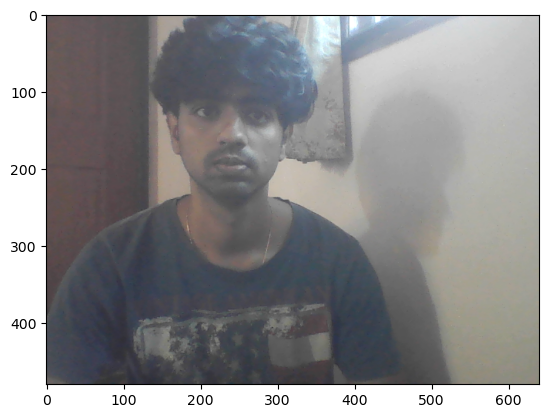

In [8]:
#raw image from video
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
draw_styled_landmarks(frame, results)#drawing landmarks to the last frame

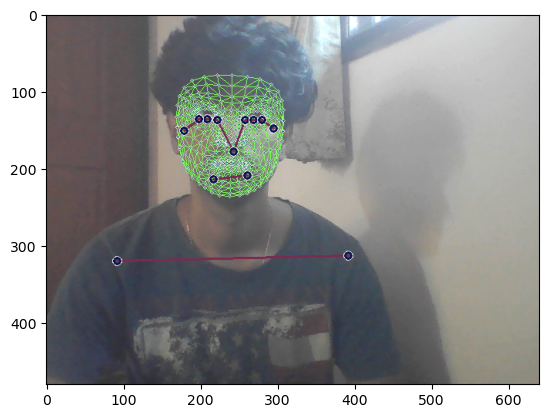

In [10]:
#image after styling with landmarks
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# **Extract KeyPoint Values**

pose has 33 landmarks
hands has 21 landmarks each
if no landmarks replace with 0, no.of landmarks * 3 --(x,y,z)
for pose: no.of landmarks * 4 --(x,y,z, visibility)

In [11]:
results#access last results through results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
pose = [] #holder array
#extracting landmarks for pose 
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y , res.z, res.visibility])
    pose.append(test)

In [13]:
#shortening through list comprehension
pose = np.array([[res.x, res.y , res.z, res.visibility] for res in results.pose_landmarks.landmark])
print("before flattening: ",pose.shape) #without flatten just sets
pose = np.array([[res.x, res.y , res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() 
print("after flattening: ",pose.shape) #effectively converted to 1 big 1d array

before flattening:  (33, 4)
after flattening:  (132,)


In [14]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
def extract_keypoints(results):
    #extracting landmarks for pose 
    pose = np.array([[res.x, res.y , res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    
    #extracting landmarks for face 
    face = np.array([[res.x, res.y , res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    
    #extracting landmarks for left hand 
    lh = np.array([[res.x, res.y , res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    #extracting landmarks for right hand 
    rh = np.array([[res.x, res.y , res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    #conacatenting keypoints and returning the result
    return np.concatenate([pose, face, lh, rh])

In [16]:
extract_keypoints(results).shape

(1662,)

In [17]:
3*(468+21+21)+ (33*4)

1662

In [18]:
result_test = extract_keypoints(results)
result_test

array([ 0.38001812,  0.37097698, -1.04613566, ...,  0.        ,
        0.        ,  0.        ])

# **Setup Folders For Collection**

the input data used for this action detection model is a series of 30 arrays each of which conatins 1662 values-(30,1662)
each of the 30 arrays represents the landmark values 1662 values from a single frame

key difference b/w action detection and other computer vision tasks is that a sequence of data rather than a single frame is used for action detection

collect 30 vides per action, 
each frame will conatain 1662 landmark value
3 *30 sequences 30 frames, 1662 landmark values

In [19]:
#path to store the explored sdata-numpy arrays
DATA_PATH = os.path.join('MP_Data')

#Lis tof Actions that we try to detect
actions = np.array(['hello','thanks','iLoveYou','HowAreYou','fine'])

#use 30 different sequences/videos of data
no_sequences = 30

#Each seq/video len is 30
sequence_length = 30

hello
0
1
2
...
29

thanks
0
1
2
...
29

iloveyou
0
1
2
...
29

In [20]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))#make sub dirs DATA_PATH->for every action->sequences
        except: #if already present pass
            pass 

# **Collect KeyPoint Values for Training and Testing**

collection breaks : having break b/w each sequence allows you to reset and reposition to collect action from start

In [ ]:
cap.release()
cv2.destroyAllWindows()

# **The below cell should be run only when there is need to create a dataset, then uncomment**


In [ ]:
""" 
cap = cv2.VideoCapture(0)  # Access the default webcam

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    frames_captured = 0
    sequences_captured = 0
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                
                image, results = mediapipe_detection(frame, holistic)  # Your mediapipe detection function
                
                draw_styled_landmarks(image, results)  # Your function to draw landmarks
                
                #  Frame processing logic ... wait &  collection logic
                if frame_num == 0:
                    # Disp Text
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Frame', image)
                    #Pause for 2 sec 
                    cv2.waitKey(2000)          
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Frame', image)
                
                # NEW extract key points
                keypoints = extract_keypoints(results)  # Your function to extract keypoints
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                frames_captured += 1
                
                if frames_captured >= sequence_length * no_sequences:
                    sequences_captured += 1
                    frames_captured = 0
                
                print(results)
                # Show the frame
                cv2.imshow('OpenCV Frame', image)
                
                # Check for 'q' key press to exit the loop
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
            # exit the loop automatically after data collection is complete
            if sequences_captured >= no_sequences:
                break
        
        if sequences_captured >= no_sequences:
            break
    cap.release()
    cv2.destroyAllWindows()  
# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()  
"""

# **Perprocess Data and Create Labels and Features**

import new dependencies
create new label map
read all data ffrom different numpy arrays
created x & y dataframes
splitted datset into train and test

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iLoveYou': 2, 'HowAreYou': 3, 'fine': 4}

In [24]:
#sequences represent feature / x
#labels represent variable / y

sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        #represent all frames of a particular sequence
        window = []
        for frame_num in range(sequence_length):
            #loading the numpy array for every frame
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(150, 30, 1662)

In [26]:
np.array(labels).shape 

(150,)

In [27]:
X = np.array(sequences)
Y = to_categorical(labels).astype(int)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.05)

In [29]:
X_train.shape

(142, 30, 1662)

# **Build and Train LSTM NN**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [31]:
#monitor logs
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [32]:
Y_train.shape#input

(142, 5)

In [33]:
X.shape

(150, 30, 1662)

In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape=(30,1662)))#64 lstm units
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))#nxt layer is a dense, so no need to return sequences
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

In [35]:
actions

array(['hello', 'thanks', 'iLoveYou', 'HowAreYou', 'fine'], dtype='<U9')

In [36]:
actions.shape[0]#3 output units softmax returns values within the probabilities of 0 to 1 &sum = 1

5

Y mp and lstm, not cnn?
a no. of cnn + lstm -> no accuracy
1. less data required -not a million, just half a million
2. faster to train
3. simpler in real time

In [37]:
#res = [.7,.2,.1]#sample result- an array of prob summing upto 1

In [38]:
#actions = [np.argmax(res)] #highest probabilty within the array denotes the action performed

In [39]:
#compile the model
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics =  ['categorical_accuracy'])

In [40]:
#train the model
model.fit(X_train, Y_train, epochs = 500, callbacks = [tb_callback])

Epoch 1/500
5/5 [==============================] - 5s 69ms/step - loss: 2.3464 - categorical_accuracy: 0.1972
Epoch 2/500
5/5 [==============================] - 0s 61ms/step - loss: 2.2818 - categorical_accuracy: 0.2113
Epoch 3/500
5/5 [==============================] - 0s 63ms/step - loss: 1.6121 - categorical_accuracy: 0.2324
Epoch 4/500
5/5 [==============================] - 0s 65ms/step - loss: 1.6010 - categorical_accuracy: 0.3028
Epoch 5/500
5/5 [==============================] - 0s 61ms/step - loss: 1.5789 - categorical_accuracy: 0.2887
Epoch 6/500
5/5 [==============================] - 0s 62ms/step - loss: 1.6532 - categorical_accuracy: 0.2183
Epoch 7/500
5/5 [==============================] - 0s 62ms/step - loss: 1.6135 - categorical_accuracy: 0.2254
Epoch 8/500
5/5 [==============================] - 0s 62ms/step - loss: 1.5839 - categorical_accuracy: 0.2676
Epoch 9/500
5/5 [==============================] - 0s 62ms/step - loss: 1.5943 - categorical_accuracy: 0.2042
Epoch 10/5

5/5 [==============================] - 0s 65ms/step - loss: 0.9290 - categorical_accuracy: 0.5986
Epoch 148/500
5/5 [==============================] - 0s 64ms/step - loss: 0.8239 - categorical_accuracy: 0.6338
Epoch 149/500
5/5 [==============================] - 0s 63ms/step - loss: 0.7803 - categorical_accuracy: 0.7113
Epoch 150/500
5/5 [==============================] - 0s 63ms/step - loss: 0.6656 - categorical_accuracy: 0.7746
Epoch 151/500
5/5 [==============================] - 0s 63ms/step - loss: 0.6205 - categorical_accuracy: 0.7676
Epoch 152/500
5/5 [==============================] - 0s 65ms/step - loss: 0.6033 - categorical_accuracy: 0.7465
Epoch 153/500
5/5 [==============================] - 0s 64ms/step - loss: 0.6925 - categorical_accuracy: 0.6549
Epoch 154/500
5/5 [==============================] - 0s 64ms/step - loss: 0.6922 - categorical_accuracy: 0.6831
Epoch 155/500
5/5 [==============================] - 0s 64ms/step - loss: 0.7752 - categorical_accuracy: 0.6620
Epoch 

5/5 [==============================] - 0s 65ms/step - loss: 0.0655 - categorical_accuracy: 0.9648
Epoch 294/500
5/5 [==============================] - 0s 65ms/step - loss: 0.0761 - categorical_accuracy: 0.9577
Epoch 295/500
5/5 [==============================] - 0s 65ms/step - loss: 0.0718 - categorical_accuracy: 0.9648
Epoch 296/500
5/5 [==============================] - 0s 65ms/step - loss: 0.2369 - categorical_accuracy: 0.9366
Epoch 297/500
5/5 [==============================] - 0s 65ms/step - loss: 0.6907 - categorical_accuracy: 0.8099
Epoch 298/500
5/5 [==============================] - 0s 65ms/step - loss: 0.2515 - categorical_accuracy: 0.8873
Epoch 299/500
5/5 [==============================] - 0s 65ms/step - loss: 0.2942 - categorical_accuracy: 0.8662
Epoch 300/500
5/5 [==============================] - 0s 66ms/step - loss: 0.2969 - categorical_accuracy: 0.8662
Epoch 301/500
5/5 [==============================] - 0s 66ms/step - loss: 0.1850 - categorical_accuracy: 0.9155
Epoch 

5/5 [==============================] - 0s 69ms/step - loss: 6.9259e-04 - categorical_accuracy: 1.0000
Epoch 439/500
5/5 [==============================] - 0s 69ms/step - loss: 6.7444e-04 - categorical_accuracy: 1.0000
Epoch 440/500
5/5 [==============================] - 0s 69ms/step - loss: 6.6268e-04 - categorical_accuracy: 1.0000
Epoch 441/500
5/5 [==============================] - 0s 67ms/step - loss: 6.4719e-04 - categorical_accuracy: 1.0000
Epoch 442/500
5/5 [==============================] - 0s 66ms/step - loss: 6.2778e-04 - categorical_accuracy: 1.0000
Epoch 443/500
5/5 [==============================] - 0s 65ms/step - loss: 6.1564e-04 - categorical_accuracy: 1.0000
Epoch 444/500
5/5 [==============================] - 0s 66ms/step - loss: 6.0123e-04 - categorical_accuracy: 1.0000
Epoch 445/500
5/5 [==============================] - 0s 67ms/step - loss: 5.9066e-04 - categorical_accuracy: 1.0000
Epoch 446/500
5/5 [==============================] - 0s 65ms/step - loss: 5.7580e-04 -

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 596,741
Trainable params: 596,741
Non-trai

# **Make Prdictions**

In [42]:
res = model.predict(X_test)

1/1 [==============================] - 0s 458ms/step


In [43]:
np.sum(res[0])# sum of all probabilities = 1

1.0

In [44]:
[np.argmax(res[0])]       # position of detected action
actions[np.argmax(res[0])]  # the detected action

'HowAreYou'

In [45]:
Y_test   

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [46]:
#unpacking first result
actions[np.argmax(Y_test[0])]  

'HowAreYou'

# **Save Weights**

In [47]:
model.save('action.h5')

In [48]:
#del model #deleting the built model
# to reload, preform the follwing:
# run the following cells, sequential and layers cell, compile cell

In [49]:
#model.load_weights('action.h5')

# **Evaluation using ConfusionMatrix and Accuracy**

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix


In [51]:
Y_pred = model.predict(X_test)

1/1 [==============================] - 0s 23ms/step


#Conversion
Running the below cells converts the predictions from their one-hot encoded representation to a categoricl label
eg: 0, 1 or 2, instead of [1,0,0],  [0,1,0] or  [0,0,1l]

In [52]:
Y_true = np.argmax(Y_test, axis = 1).tolist()
Y_pred = np.argmax(Y_pred, axis = 1).tolist()

In [53]:
Y_pred

[3, 2, 4, 2, 4, 4, 1, 3]

In [54]:
multilabel_confusion_matrix(Y_true,Y_pred)

array([[[7, 0],
        [1, 0]],

       [[7, 0],
        [0, 1]],

       [[6, 1],
        [0, 1]],

       [[6, 0],
        [0, 2]],

       [[5, 0],
        [0, 3]]], dtype=int64)

In [55]:
#accuracy of the model
accuracy_score(Y_true,Y_pred)

0.875

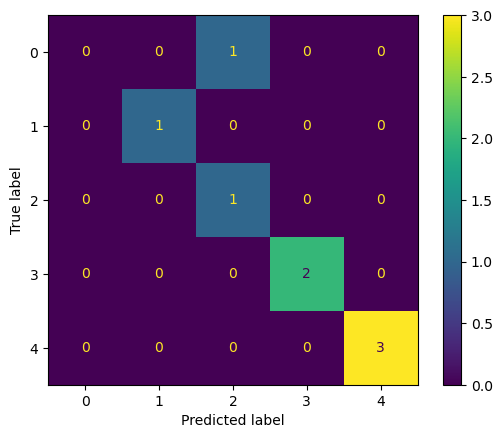

In [56]:
# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# **Real Time Testing**

In [97]:
from scipy import stats

In [98]:
colors = [(245,117,16), (117,245,16), (16,117,245),(255,0,203),(209,255,0)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

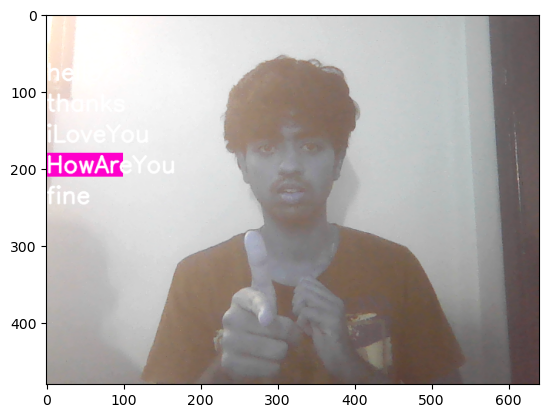

In [99]:
plt.imshow(prob_viz(res, actions, frame, colors))

In [80]:
cap.release()
cv2.destroyAllWindows()

In [96]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            #Visualization probabilities
            image = prob_viz(res, actions, image, colors)
        
        #Display text
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 21ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
fine
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==================

1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
thanks
<class 'media

1/1 [==============================] - 0s 20ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
fine
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 18ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
fine
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 19ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/s

1/1 [==============================] - 0s 18ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
HowAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/s

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [================

1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
fine
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solut

In [100]:
model.predict(X_test) 

1/1 [==============================] - 0s 53ms/step


array([[3.56313443e-24, 2.75950426e-11, 9.17533232e-22, 1.00000000e+00,
        6.07029401e-20],
       [3.27916816e-03, 4.54868563e-03, 9.92170393e-01, 1.18334253e-06,
        5.51664243e-07],
       [5.62892106e-17, 1.07431015e-05, 1.37849218e-29, 8.94620083e-04,
        9.99094605e-01],
       [2.99581657e-08, 4.44259797e-07, 9.99999523e-01, 3.90483883e-15,
        6.02804563e-18],
       [4.65050576e-08, 1.10176989e-05, 1.68809813e-10, 3.61768215e-08,
        9.99988914e-01],
       [1.97156214e-06, 1.87174987e-06, 7.61104735e-10, 2.43706051e-08,
        9.99996185e-01],
       [6.48882030e-17, 9.99991298e-01, 5.70074826e-06, 3.00030115e-06,
        3.94777705e-15],
       [1.31936689e-17, 1.10678693e-08, 6.77558489e-16, 1.00000000e+00,
        2.45427034e-14]], dtype=float32)

In [101]:
X_test[0].shape #expected seq shape (1,30,1662)

(30, 1662)

In [102]:
np.expand_dims(X_test[0],axis=0)

array([[[ 0.60542691,  0.46108788, -0.50827628, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.58555192,  0.45832837, -0.67405415, ...,  0.50444996,
          0.9053694 , -0.0077117 ],
        [ 0.57414711,  0.45612928, -0.821509  , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.42903119,  0.48202562, -0.48462743, ...,  0.15889736,
          0.90506554, -0.02620516],
        [ 0.42468891,  0.48223495, -0.47703785, ...,  0.16005057,
          0.88800377, -0.02648826],
        [ 0.42149076,  0.48203522, -0.48164362, ...,  0.15595728,
          0.87781262, -0.0280798 ]]])

In [103]:
res[np.argmax(res)] > threshold #op true

True

In [104]:
model.predict(np.expand_dims(X_test[0], axis=0)) 

1/1 [==============================] - 0s 20ms/step


array([[3.5631072e-24, 2.7594937e-11, 9.1753323e-22, 1.0000000e+00,
        6.0702475e-20]], dtype=float32)